In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.sample(10)

,sms,label
2208,Usually the body takes care of it buy making s...,0
4746,Camera - You are awarded a SiPix Digital Camer...,1
3226,I need... Coz i never go before \n,0
4378,How much is torch in 9ja.\n,0
740,Haha mayb u're rite... U know me well. Da feel...,0
2981,What u mean u almost done? Done wif sleeping? ...,0
2839,Were trying to find a Chinese food place aroun...,0
2335,Do you like Italian food?\n,0
4964,I want to see your pretty pussy...\n,0
1332,Good Morning plz call me sir\n,0


In [4]:
df.shape

(5574, 2)

## 1. Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5574 entries, 0 to 5573
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   sms     5574 non-null   object
 1   label   5574 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 87.2+ KB


In [6]:
df.head()

,sms,label
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...\n,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


In [7]:
df.rename(columns={'label':'target','sms':'text'},inplace=True)
df.sample(5)

,text,target
2286,"Hi, wkend ok but journey terrible. Wk not good...",0
2685,Yupz... I've oredi booked slots 4 my weekends ...,0
3597,Good morning princess! Happy New Year!\n,0
5484,URGENT We are trying to contact you Last weeke...,1
5527,I want to tell you how bad I feel that basical...,0


In [8]:
df.head()

,text,target
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...\n,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


In [9]:
df.isnull().sum()

text      0
target    0
dtype: int64

In [10]:
df.duplicated().sum()

403

In [11]:
df = df.drop_duplicates(keep='first')

In [12]:
df.duplicated().sum()

0

In [13]:
df.shape

(5171, 2)

## 2.EDA

In [14]:
df.head()

,text,target
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...\n,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


In [15]:
df['target'].value_counts()

target
0    4518
1     653
Name: count, dtype: int64

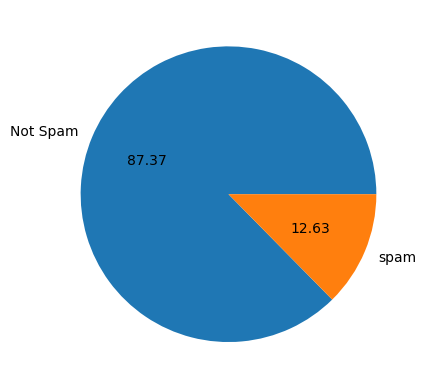

In [16]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['Not Spam','spam'],autopct="%0.2f")
plt.show()

In [17]:
# Data is imbalanced

In [18]:
import nltk

In [19]:
df['num_characters'] = df['text'].apply(len)

In [20]:
df.head()

,text,target,num_characters
0,"Go until jurong point, crazy.. Available only ...",0,112
1,Ok lar... Joking wif u oni...\n,0,30
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,156
3,U dun say so early hor... U c already then say...,0,50
4,"Nah I don't think he goes to usf, he lives aro...",0,62


In [21]:
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [22]:
df.head()

,text,target,num_characters,num_words
0,"Go until jurong point, crazy.. Available only ...",0,112,24
1,Ok lar... Joking wif u oni...\n,0,30,8
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,156,37
3,U dun say so early hor... U c already then say...,0,50,13
4,"Nah I don't think he goes to usf, he lives aro...",0,62,15


In [23]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [24]:
df.head()

,text,target,num_characters,num_words,num_sentences
0,"Go until jurong point, crazy.. Available only ...",0,112,24,2
1,Ok lar... Joking wif u oni...\n,0,30,8,2
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,156,37,2
3,U dun say so early hor... U c already then say...,0,50,13,1
4,"Nah I don't think he goes to usf, he lives aro...",0,62,15,1


In [25]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5171.000000,5171.000000,5171.000000
mean,80.332431,18.606459,1.973893
std,58.333188,13.388223,1.458880
min,3.000000,1.000000,1.000000
25%,37.000000,9.000000,1.000000
50%,62.000000,15.000000,1.000000
75%,120.000000,26.500000,2.000000
max,911.000000,220.000000,38.000000


In [26]:
# Not Spam
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4518.000000,4518.000000,4518.000000
mean,71.894865,17.282205,1.827579
std,56.590179,13.572746,1.394245
min,3.000000,1.000000,1.000000
25%,35.000000,8.000000,1.000000
50%,54.000000,13.000000,1.000000
75%,92.000000,22.000000,2.000000
max,911.000000,220.000000,38.000000


In [27]:
#spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,138.710567,27.768760,2.986217
std,29.818940,6.987509,1.494815
min,14.000000,2.000000,1.000000
25%,133.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,158.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [28]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

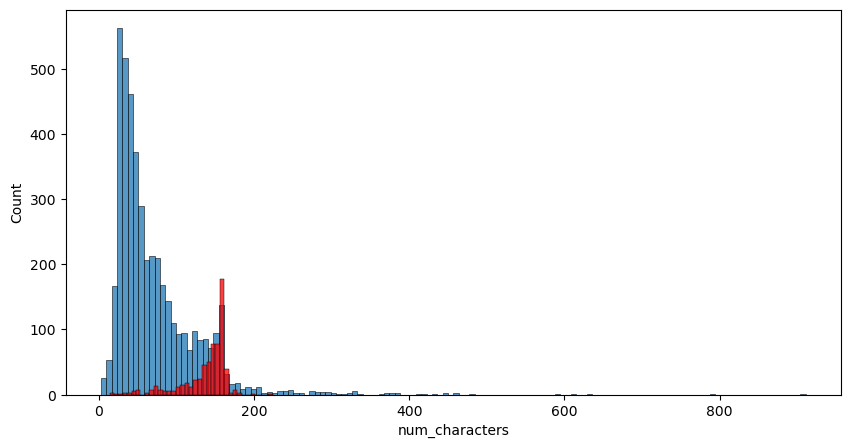

In [106]:
plt.figure(figsize=(10,5))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

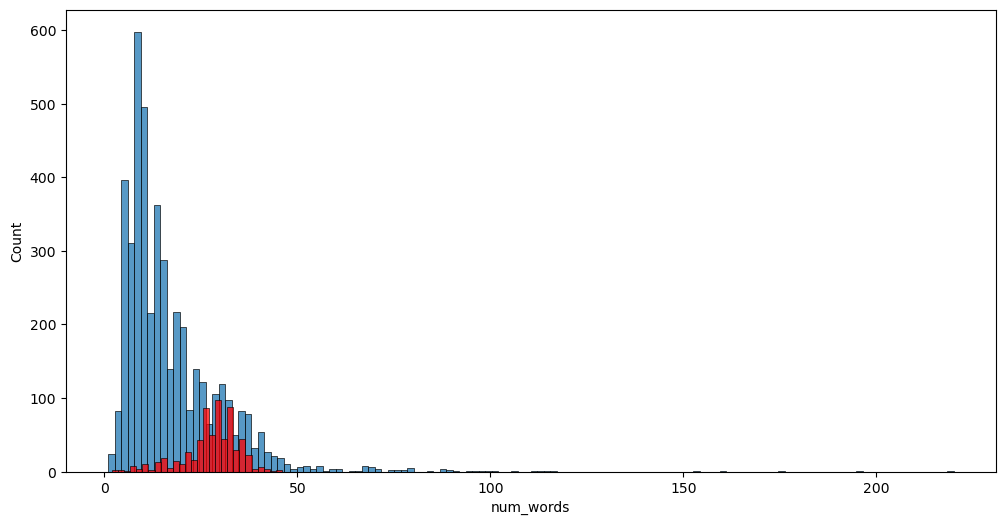

In [30]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


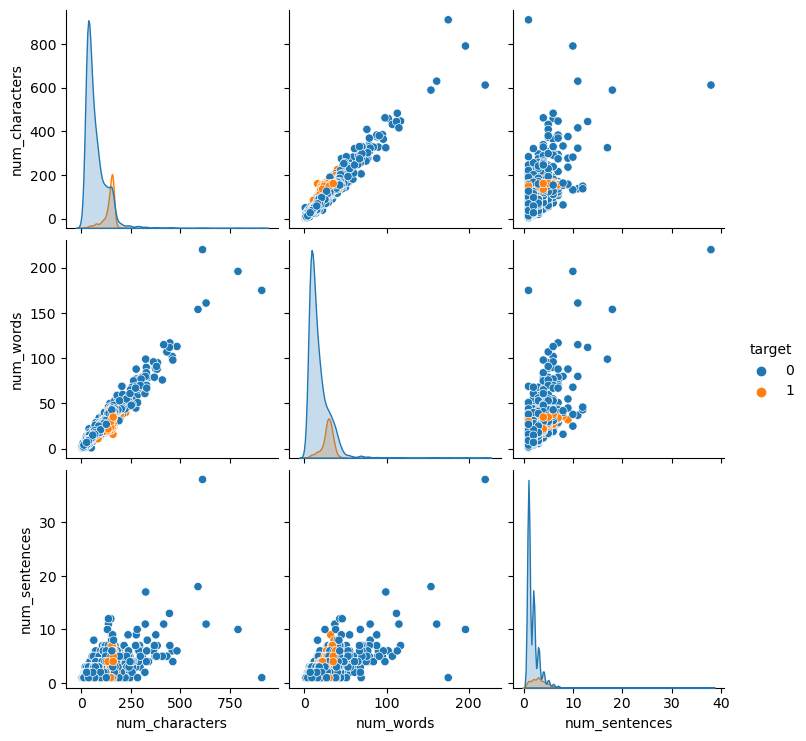

In [31]:
sns.pairplot(df,hue='target')

<Axes: >

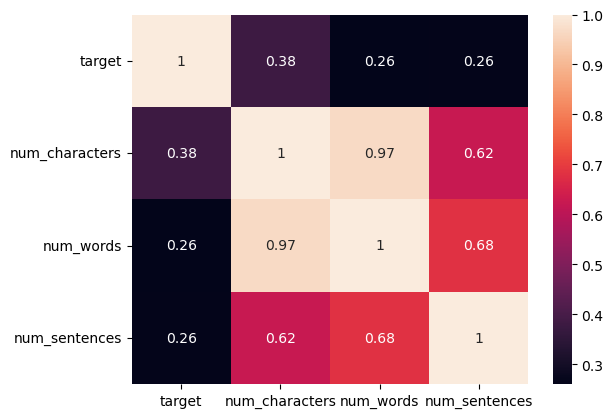

In [32]:
numeric_df = df.select_dtypes(include='number')
sns.heatmap(numeric_df.corr(), annot=True)

## 3. Data Preprocessing
- Lower case
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- Stemming

In [33]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Irfan
[nltk_data]     Arshad\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [34]:
import string
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    ps = PorterStemmer()
    
    for i in text:
        y.append(ps.stem(i))
    
    return " ".join(y)

In [35]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [36]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.\n"

In [37]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [38]:
df['transformed_text'] = df['text'].apply(transform_text)

In [39]:
df.head()

,text,target,num_characters,num_words,num_sentences,transformed_text
0,"Go until jurong point, crazy.. Available only ...",0,112,24,2,go jurong point crazi avail bugi n great world...
1,Ok lar... Joking wif u oni...\n,0,30,8,2,ok lar joke wif u oni
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,156,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,U dun say so early hor... U c already then say...,0,50,13,1,u dun say earli hor u c alreadi say
4,"Nah I don't think he goes to usf, he lives aro...",0,62,15,1,nah think goe usf live around though


In [40]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [41]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

Text(0.5, 1.0, 'Spam WordCloud')

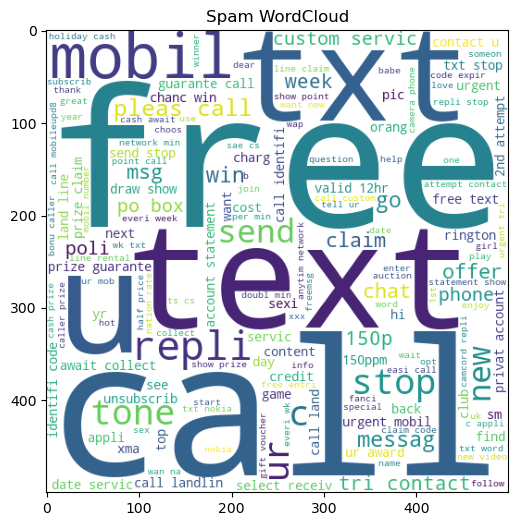

In [42]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)
plt.title('Spam WordCloud')

In [43]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

Text(0.5, 1.0, 'Not-Spam WordCloud')

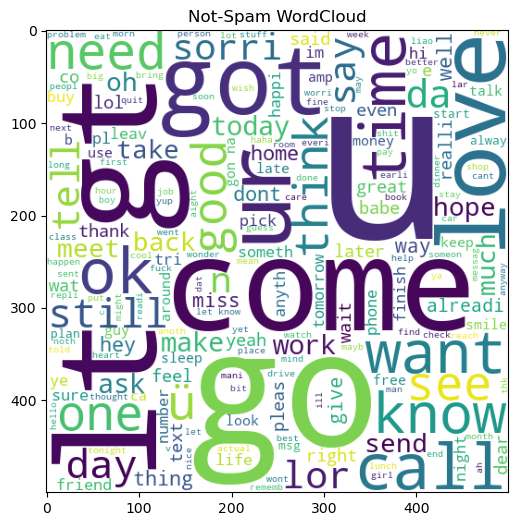

In [44]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)
plt.title('Not-Spam WordCloud')

In [45]:
df.head()

,text,target,num_characters,num_words,num_sentences,transformed_text
0,"Go until jurong point, crazy.. Available only ...",0,112,24,2,go jurong point crazi avail bugi n great world...
1,Ok lar... Joking wif u oni...\n,0,30,8,2,ok lar joke wif u oni
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,156,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,U dun say so early hor... U c already then say...,0,50,13,1,u dun say earli hor u c alreadi say
4,"Nah I don't think he goes to usf, he lives aro...",0,62,15,1,nah think goe usf live around though


In [46]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        

In [47]:
len(spam_corpus)

9982

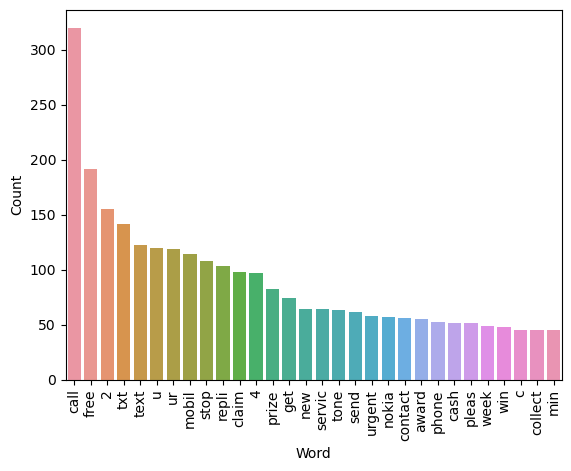

In [48]:
from collections import Counter


counter_df = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['Word', 'Count'])
sns.barplot(x='Word', y='Count', data=counter_df)
plt.xticks(rotation='vertical')
plt.show()

In [49]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [50]:
len(ham_corpus)

35937

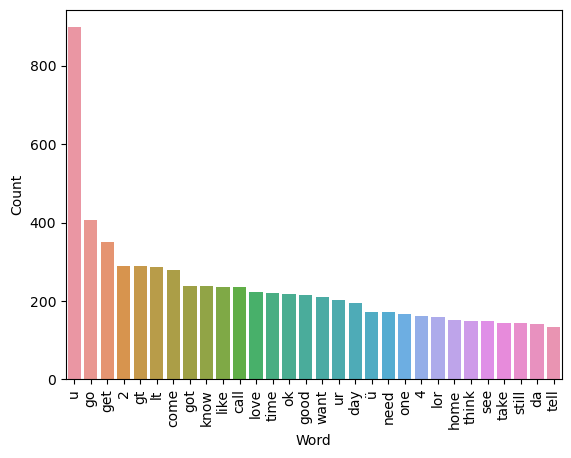

In [51]:
from collections import Counter

counter_df_ham = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['Word', 'Count'])

sns.barplot(x='Word', y='Count', data=counter_df_ham)
plt.xticks(rotation='vertical')
plt.show()

In [52]:
df.head()

,text,target,num_characters,num_words,num_sentences,transformed_text
0,"Go until jurong point, crazy.. Available only ...",0,112,24,2,go jurong point crazi avail bugi n great world...
1,Ok lar... Joking wif u oni...\n,0,30,8,2,ok lar joke wif u oni
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,156,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,U dun say so early hor... U c already then say...,0,50,13,1,u dun say earli hor u c alreadi say
4,"Nah I don't think he goes to usf, he lives aro...",0,62,15,1,nah think goe usf live around though


## 4. Model Building

In [53]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [54]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [57]:
X.shape

(5171, 3000)

In [58]:
y = df['target'].values

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [95]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [96]:
mnb = MultinomialNB()

In [100]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print('Accuracy: ', accuracy_score(y_test,y_pred2))
print('Precision: ',precision_score(y_test,y_pred2))
print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred2))

Accuracy:  0.9603864734299516
Precision:  1.0
Confusion Matrix:
 [[887   0]
 [ 41 107]]


In [101]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [102]:
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)

In [69]:
clfs = {
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
}

In [70]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [71]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  KN
Accuracy -  0.9053140096618357
Precision -  1.0
For  NB
Accuracy -  0.9603864734299516
Precision -  1.0
For  DT
Accuracy -  0.9169082125603865
Precision -  0.8297872340425532
For  LR
Accuracy -  0.9449275362318841
Precision -  0.941747572815534
For  RF
Accuracy -  0.9652173913043478
Precision -  1.0


In [72]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [73]:
performance_df

,Algorithm,Accuracy,Precision
0,KN,0.905314,1.000000
1,NB,0.960386,1.000000
4,RF,0.965217,1.000000
3,LR,0.944928,0.941748
2,DT,0.916908,0.829787


In [74]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [75]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.905314
1,NB,Accuracy,0.960386
2,RF,Accuracy,0.965217
3,LR,Accuracy,0.944928
4,DT,Accuracy,0.916908
5,KN,Precision,1.000000
6,NB,Precision,1.000000
7,RF,Precision,1.000000
8,LR,Precision,0.941748
9,DT,Precision,0.829787


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


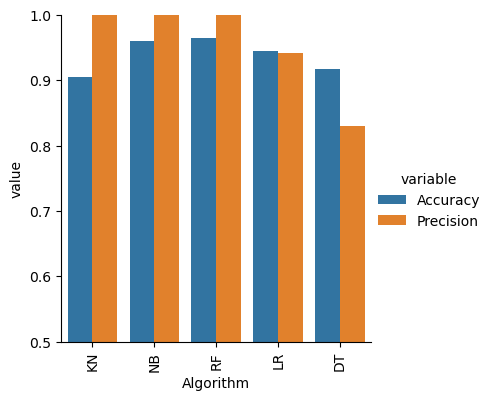

In [105]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=4)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [77]:
# model improve

In [78]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [79]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [80]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [81]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [82]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [83]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.905314,1.000000,0.905314,1.000000,0.905314,1.000000,0.905314,1.000000
1,NB,0.960386,1.000000,0.960386,1.000000,0.960386,1.000000,0.960386,1.000000
2,RF,0.965217,1.000000,0.965217,1.000000,0.965217,1.000000,0.965217,1.000000
3,LR,0.944928,0.941748,0.944928,0.941748,0.944928,0.941748,0.944928,0.941748
4,DT,0.916908,0.829787,0.916908,0.829787,0.916908,0.829787,0.916908,0.829787


In [103]:
from sklearn.ensemble import ExtraTreesClassifier

mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [104]:
voting = VotingClassifier(estimators=[('nb', mnb), ('et', etc)],voting='soft')

In [86]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [87]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9671497584541063
Precision 1.0


In [88]:
estimators=[('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [89]:
from sklearn.ensemble import StackingClassifier

In [90]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [91]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9739130434782609
Precision 0.9618320610687023


In [92]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))